# Parsing examples

Some examples on parsing to and from supported formats. More info about all parsing methods can be found in the [manual section](../manual/parsing.rst).

## Declare paths

First, let's do all the necessary imports and generate the paths that we'll use for file import and export.

In [1]:
from pathlib import Path
import pygaps.parsing as pgp

# Get directory paths
base_path = Path.cwd() / 'data' / 'parsing'

# Find files
json_file_paths = list((base_path/'json').rglob('*.json'))
xl_file_paths = list((base_path/'excel').rglob('*.xls'))
csv_file_paths = list((base_path/'csv').rglob('*.csv'))

## JSON Parsing
### JSON Import

Isotherms can be imported either from a json file or from a json string. The same function is used in both cases.

In [2]:
# Import them
isotherms = [pgp.isotherm_from_json(path) for path in json_file_paths]

# Display an example file
print(isotherms[1])

Material: HKUST-1(Cu)
Adsorbate: carbon dioxide
Temperature: 303.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	comment: None
	date: 2010-05-21 00:00:00
	iso_type: Calorimetrie
	lab: MADIREL
	instrument: CV
	material_batch: Test
	project: None
	activation_temperature: 150.0
	user: ADW



### JSON Export

Exporting to JSON can be done to a file or a string, depending on whether a path is passed. For this purpose use either the module `pygaps.isotherm_to_json()` function or the convenience class function `to_json()`.

In [3]:
# module function
for isotherm in isotherms:
    filename = ' '.join([str(isotherm.material), str(isotherm.adsorbate), str(isotherm.temperature)]) + '.json'
    pgp.isotherm_to_json(isotherm, base_path / 'json' / filename)
    
# save to file with convenience function
isotherms[0].to_json('isotherm.json')

# string
isotherm_string = isotherms[0].to_json()

## Excel Parsing

Excel *does not* have to be installed on the system in use.     

### Excel Import

In [4]:
# Import them
isotherms = [pgp.isotherm_from_xl(path) for path in xl_file_paths]

# Display an example file
print(isotherms[1])

The file version is None while the parser uses version 3.0. Strange things might happen, so double check your data.
The file version is None while the parser uses version 3.0. Strange things might happen, so double check your data.
Material: HKUST-1(Cu)
Adsorbate: carbon dioxide
Temperature: 303.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	date: 2010-05-21 00:00:00
	lab: MADIREL
	instrument: CV
	project: None
	activation_temperature: 150.0
	user: ADW
	comment: None
	iso_type: Calorimetrie
	material_batch: Test



(
    <AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>,
    <AxesSubplot:ylabel='enthalpy(kJ/mol)'>
)

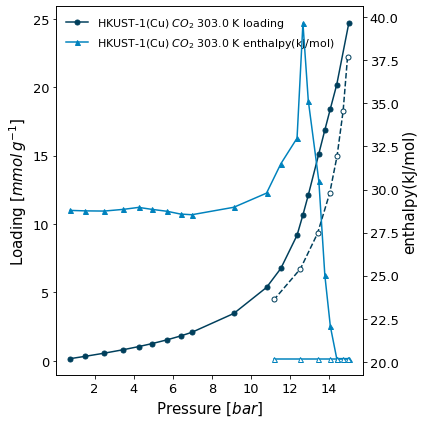

In [5]:
isotherms[1].plot()

### Excel Export

In [6]:
# Export each isotherm in turn
for isotherm in isotherms:
    filename = ' '.join([str(isotherm.material), str(isotherm.adsorbate), str(isotherm.temperature)]) + '.xls'
    pgp.isotherm_to_xl(isotherm, base_path / 'excel' / filename)

# save to file with convenience function
isotherms[0].to_xl('isotherm.xls')

## CSV Parsing
### CSV Import


Like JSON, isotherms can be imported either from a CSV file or from a CSV string. The same function is used in both cases.

In [7]:
# Import them
isotherms = [pgp.isotherm_from_csv(path) for path in csv_file_paths]

# Display an example file
print(isotherms[0])

Material: HKUST-1(Cu)
Adsorbate: carbon dioxide
Temperature: 303.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	material_batch: Test
	iso_type: Calorimetrie
	user: ADW
	machine: CV
	date: 21/05/2010 00:00
	activation_temperature: 150.0
	lab: MADIREL



### CSV Export

In [8]:
# Export each isotherm in turn
for isotherm in isotherms:
    filename = ' '.join([str(isotherm.material), str(isotherm.adsorbate), str(isotherm.temperature)]) + '.csv'
    pgp.isotherm_to_csv(isotherm, base_path / 'csv' / filename)

# save to file with convenience function
isotherms[0].to_csv('isotherm.csv')

# string representation
isotherm_string = isotherms[0].to_csv()